In [1]:
# import required libraries
import os, sys
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score
import matplotlib.lines as mlines
import warnings

In [2]:
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 20})
warnings.filterwarnings('ignore')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Arial'
sns.set_context('poster')

In [22]:
################ Dot Product Distribution for Unbiased vs GSOnly #####
dp = pd.read_csv("data/library_A35_G34_dotproduct.csv", sep="\t")
dp_GS = dp.iloc[:5000, :]
dp_GSWF = dp_GS.loc[dp_GS.dot_product < 0.75]
dp_GSSF = dp_GS.loc[dp_GS.dot_product < 0.5]

idx = np.array(np.genfromtxt("data/Unbiased_SAS_20X100_500K_AllIndices.txt"), dtype=int)
idx_GS = np.array(np.genfromtxt("data/GSOnly_SAS_20X100_500K_All_Indices.txt"), dtype=int)
idx_GSWF = np.array(np.genfromtxt("data/GSOnlyWeakFilter_SAS_AllIndices.txt"), dtype=int)
idx_GSSF = np.array(np.genfromtxt("data/GSOnlyStrongFilter_SAS_AllIndices.txt"), dtype=int)


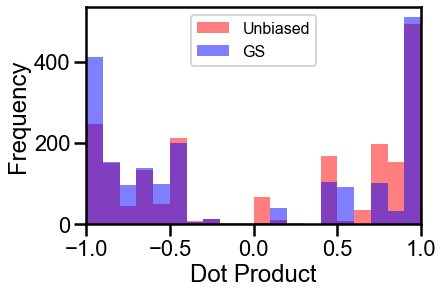

In [26]:
################ Dot Product Distribution for Unbiased vs GSOnly #####
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dp["dot_product"].iloc[idx], range=[-1, 1], bins=20, color="red", alpha=0.5, label="Unbiased")
ax.hist(dp_GS["dot_product"].iloc[idx_GS], range=[-1, 1], bins=20, color="blue", alpha=0.5, label="GS")
ax.set_xlabel("Dot Product")
ax.set_ylabel("Frequency")
ax.set_xlim([-1, 1])
ax.legend(fontsize=16)
plt.savefig("plots/GSOnly_DotProduct_Comparison.pdf")

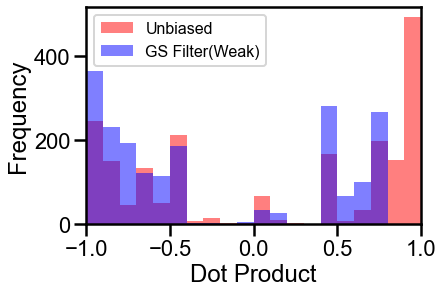

In [27]:
################ Dot Product Distribution for Unbiased vs GSWeakCutoffOnly #####\fig, ax = plt.subplots(figsize=(6,4))
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dp["dot_product"].iloc[idx], range=[-1, 1], bins=20, color="red", alpha=0.5, label="Unbiased")
ax.hist(dp_GSWF["dot_product"].iloc[idx_GSWF], range=[-1, 1], bins=20, color="blue", alpha=0.5, label="GS Filter(Weak)")
ax.legend(fontsize=16)
ax.set_xlabel("Dot Product")
ax.set_ylabel("Frequency")
ax.set_xlim([-1, 1])
plt.savefig("plots/GSWeakFilterOnly_DotProduct_Comparison.pdf")

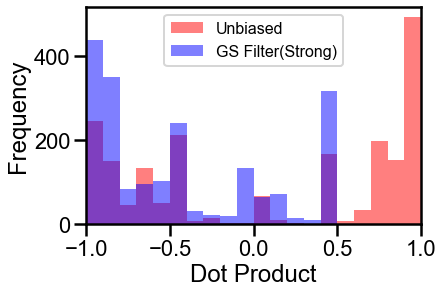

In [28]:
################ Dot Product Distribution for Unbiased vs GSStrongCutoffOnly #####
fig, ax = plt.subplots(figsize=(6,4))
ax.hist(dp["dot_product"].iloc[idx], range=[-1, 1], bins=20, color="red", alpha=0.5, label="Unbiased")
ax.hist(dp_GSSF["dot_product"].iloc[idx_GSSF], range=[-1, 1], bins=20, color="blue", alpha=0.5, label="GS Filter(Strong)")
ax.legend(fontsize=16)
ax.set_xlabel("Dot Product")
ax.set_ylabel("Frequency")
ax.set_xlim([-1, 1])
plt.savefig("plots/GSStrongFilterOnly_DotProduct_Comparison.pdf")

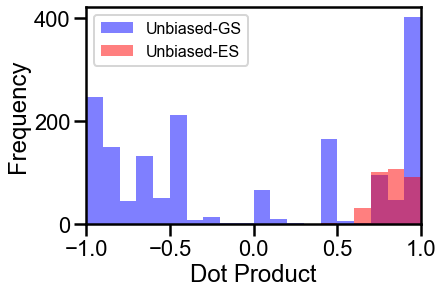

In [31]:
################ Dot Product Distribution for Unbiased 
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(dp["dot_product"].iloc[idx[idx<5000]], range=[-1, 1], bins=20, color="blue", alpha=0.5, label="Unbiased-GS")
ax.hist(dp["dot_product"].iloc[idx[idx>=5000]], range=[-1, 1], bins=20, color="red", alpha=0.5, label="Unbiased-ES")

ax.legend(fontsize=16)
ax.set_xlabel("Dot Product")
ax.set_ylabel("Frequency")
ax.set_xlim([-1, 1])
plt.savefig("plots/Unbiased_DotProduct_Comparison.pdf")